# Loading packages

In [69]:
#Comment out the other paths and comment in your path
path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [70]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [71]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [72]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [73]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [74]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

Variable coding and transforming variables

In [75]:
# drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [76]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [77]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

In [78]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.6]","(42.6, 66.0]","(66.0, 158.33]"
default,,,,,,,,,,
0,69,61,75,78,36,67,63,54,65,62
1,5,1,3,6,4,0,7,5,3,4


### Cash

0
count    668.000000
mean      17.659087
std       25.138201
min        0.000235
25%        0.564723
50%        3.348859
75%       25.495403
max       68.910169
Name: cash_coverage, dtype: float64
68.910169    101
2.571632       8
0.309814       1
4.147201       1
8.878006       1
            ... 
13.573122      1
7.043420       1
18.153845      1
2.550699       1
0.001048       1
Name: cash_coverage, Length: 561, dtype: int64


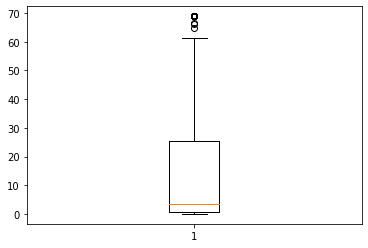

In [79]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.25))
df_train['oth_interest_exp'] = df_train['oth_interest_exp'].replace(np.nan, np.quantile(df_train['oth_interest_exp'].dropna(),.25))
df_train['cash_coverage'] = df_train['cash']/df_train['oth_interest_exp']
df_train['cash_coverage'] = sci.stats.mstats.winsorize(df_train['cash_coverage'], limits =[0.0, 0.15])

print(df_train['cash_coverage'].isnull().sum())
print(df_train['cash_coverage'].describe())
print(df_train['cash_coverage'].value_counts())
plt.boxplot(df_train['cash_coverage'])
plt.show()

#Same procedure for test
df_test['cash'] = df_test['cash'].replace(np.nan, np.quantile(df_test['cash'].dropna(),.5))
df_test['cash'] = sci.stats.mstats.winsorize(df_test['cash'], limits =[0.0, 0.015])

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [80]:
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.25))
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.025])

df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.25))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.025])

### Equity Ratio 

\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [81]:
np.where(df_train['total_equity'] > 1, df_train['total_equity'], 0)
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = df_train['total_assets'] - df_train['total_liabilities']
df_train['equity_ratio'] = df_train['total_equity']/df_train['total_assets']

np.where(df_test['total_equity'] > 1, df_test['total_equity'], 0)
df_test.loc[df_test.total_equity.isnull(), 'total_equity'] = df_test['total_assets'] - df_test['total_liabilities']
df_test['equity_ratio'] = df_test['total_equity']/df_test['total_assets']

### Working Capital Ratio
liquidity ratios measuring a companies ability to meet its short term dept obligations

\begin{equation*}
Working\ Capital\ Ratio = \frac{Current\ Assets}{Current\ Liabilities}
\end{equation*}


In [82]:
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.1])

df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.01])

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [83]:
df_train['roa'] = df_train['result_from_ord_bus']/df_train['total_assets']
df_train['roa'] = sci.stats.mstats.winsorize(df_train['roa'], limits =[0.03, 0.05])

df_test['roa'] = df_test['result_from_ord_bus']/df_test['total_assets']
df_test['roa'] = sci.stats.mstats.winsorize(df_test['roa'], limits =[0.03, 0.05])

### Operating Cashflow Ratio 


\begin{equation*}
Operating\ Cashflow\ Ratio = \frac{Operating\ Cashflow}{Sales}
\end{equation*}


In [84]:
ocf_train = np.where(df_train['cf_operating'].between(-1, 1, inclusive=True), 0, df_train['cf_operating'])
df_train['ocf_ratio'] = ocf_train/df_train['total_liabilities_st']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.03, 0.05])
# df_train['ocf_ratio'] = ocf_train/df_train['sales']
# df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])


ocf_test = np.where(df_test['cf_operating'].between(-1, 1, inclusive=True), 0, df_test['cf_operating'])
df_test['ocf_ratio'] = ocf_test/df_test['total_liabilities_st']
df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.03, 0.05])
df_test['ocf_ratio'] = ocf_test/df_test['sales']
# df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.01, 0.02])

\begin{equation*}
Debt-to-Equity\ Ratio = \frac{Total\ Debt}{Total\ Equity}
\end{equation*}


In [85]:
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])

df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

\begin{equation*}
EBIT\ Margin = \frac{EBIT}{Sales}
\end{equation*}


In [86]:
df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])

df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

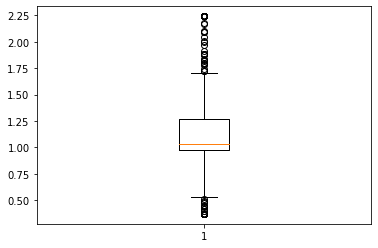

In [87]:
# neue ratio
df_train['neu'] = df_train['earn_from_op']/df_train['result_from_ord_bus']
df_train['neu'] = sci.stats.mstats.winsorize(df_train['neu'], limits =[0.1, 0.1])
plt.boxplot(df_train['neu'])
plt.show()

### Boxplots for Ratios

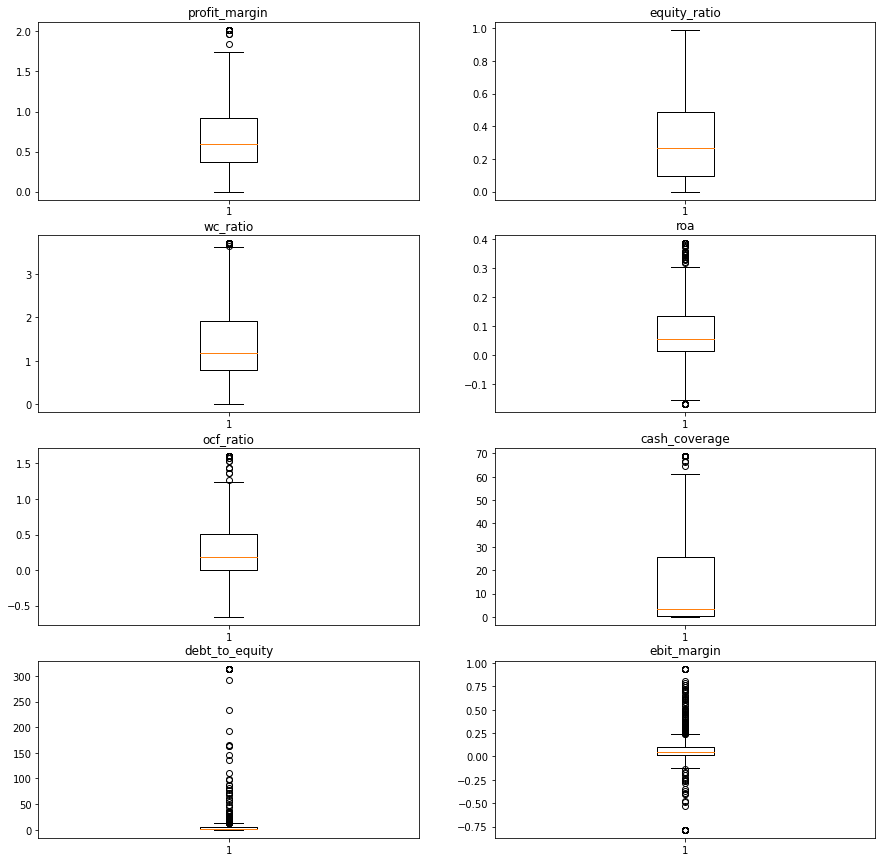

In [88]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['profit_margin'])
ax[0,0].set_title('profit_margin')
ax[0,1].boxplot(df_train['equity_ratio'])
ax[0,1].set_title('equity_ratio')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['roa'])
ax[1,1].set_title('roa')
ax[2,0].boxplot(df_train['ocf_ratio'])
ax[2,0].set_title('ocf_ratio')
ax[2,1].boxplot(df_train['cash_coverage'])
ax[2,1].set_title('cash_coverage')
ax[3,0].boxplot(df_train['debt_to_equity'])
ax[3,0].set_title('debt_to_equity')
ax[3,1].boxplot(df_train['ebit_margin'])
ax[3,1].set_title('ebit_margin')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [89]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [90]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

,P-Value,NAs
equity_ratio,0.000102,0
cash_coverage,0.010210,0
wc_ratio,0.025687,0
cash,0.037574,0
year_inc,0.055778,0
total_equity,0.080663,0
roa,0.095320,0
gross_profit,0.158572,0
profit_margin,0.164943,0
cf_operating,0.242346,1


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [91]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [92]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

,Test statistic,P-Value,NAs
cash_coverage,6364.5,5.866965e-07,0
equity_ratio,6800.0,3.820160e-06,0
total_equity,7142.0,1.464164e-05,0
cash,7348.0,3.159452e-05,0
trade_receivables_lt,8295.0,7.347649e-04,644
trade_payables_lt,8433.0,1.102325e-03,664
bonds_payables_lt,8470.0,1.226194e-03,668
bonds_payables_st,8470.0,1.226194e-03,668
monetary_current_assets,8691.0,2.270867e-03,0
bonds_payables_mt,8853.0,3.491735e-03,663


In [93]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

,P-Value Univ. Logit,P-Value MannU,NAs
equity_ratio,0.000102,3.820160e-06,0
cash_coverage,0.010210,5.866965e-07,0
wc_ratio,0.025687,9.430937e-03,0
cash,0.037574,3.159452e-05,0
year_inc,0.055778,2.553585e-01,0
total_equity,0.080663,1.464164e-05,0
roa,0.095320,7.322908e-02,0
gross_profit,0.158572,1.280942e-02,0
profit_margin,0.164943,7.004908e-02,0
cf_operating,0.242346,6.265749e-03,1


### Categorical Variables

In [94]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:

- Age
- Cash
- Profit Margin
- EBIT Margin
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt-to-Equity Ratio
- Return on Assets

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [95]:
col_list = ["age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
summary.loc[col_list,:]

,P-Value Univ. Logit,P-Value MannU,NAs
age_num,0.721892,0.256055,0
cash,0.037574,0.000032,0
profit_margin,0.164943,0.070049,0
ebit_margin,0.567159,0.284780,0
wc_ratio,0.025687,0.009431,0
ocf_ratio,0.258850,0.088437,0
equity_ratio,0.000102,0.000004,0
debt_to_equity,0.699450,0.116385,0
roa,0.095320,0.073229,0


## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [96]:
col_list = ["default","age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,cash,profit_margin,ebit_margin,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,121.0,10297047.50,0.361114,0.061157,3.710767,0.949635,7.385670e-01,0.352444,0.180537
1,0,45.0,926383.75,1.104725,0.027363,0.663710,-0.617484,3.896983e-01,1.560542,0.095967
2,0,59.0,9146283.79,2.012151,0.023240,3.328108,1.130863,9.370190e-04,163.778649,0.001684
3,0,49.0,6890565.23,2.012151,0.133260,3.193566,0.665113,5.925318e-01,0.236311,0.030412
4,0,113.0,5036615.09,1.135876,0.489225,0.102055,0.374604,4.174963e-01,1.329259,0.040158
...,...,...,...,...,...,...,...,...,...,...
664,0,44.0,31000.00,0.506472,0.013336,0.835583,0.026441,1.823358e-01,4.484386,-0.001518
665,0,21.0,252537.31,0.446851,0.047281,1.213142,-0.475269,3.418227e-01,1.925494,0.173649
666,0,21.0,573037.66,1.000000,0.298976,0.041927,0.009356,-3.086604e-17,0.000000,0.013497
667,0,14.0,5652.17,1.049012,0.053456,0.615002,0.220748,-1.273479e-16,0.000000,0.063753


### Age

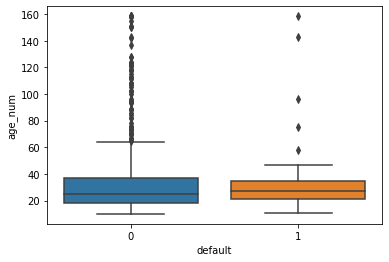

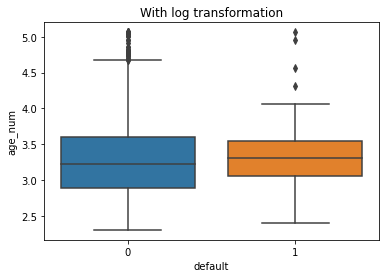

<Figure size 432x288 with 0 Axes>

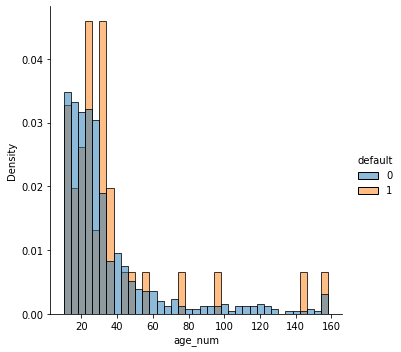

In [97]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

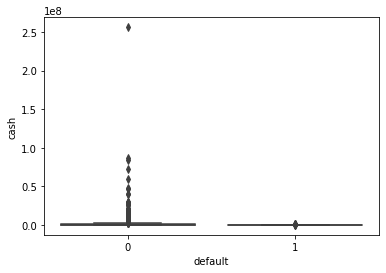

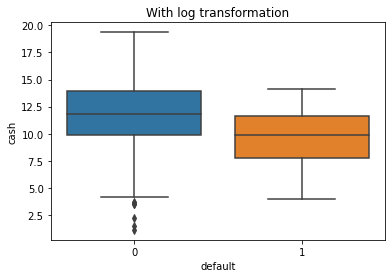

<Figure size 432x288 with 0 Axes>

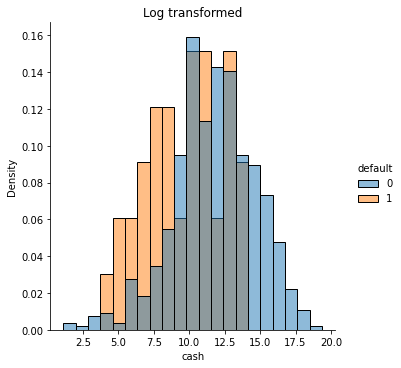

In [98]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

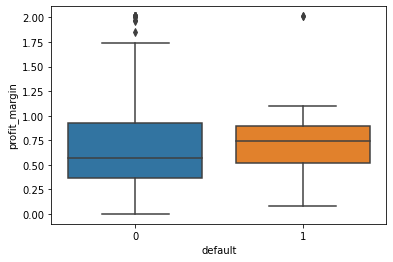

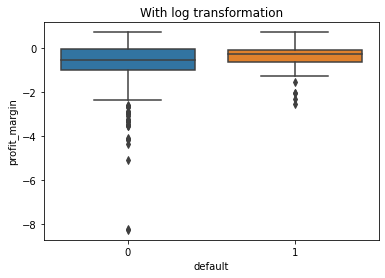

<Figure size 432x288 with 0 Axes>

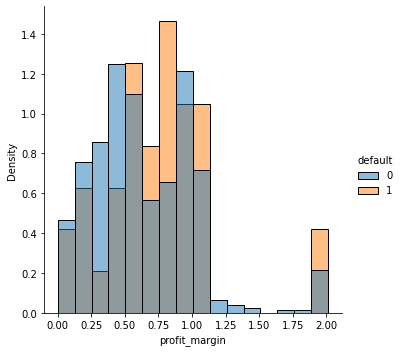

In [99]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

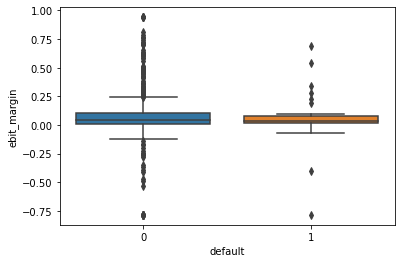

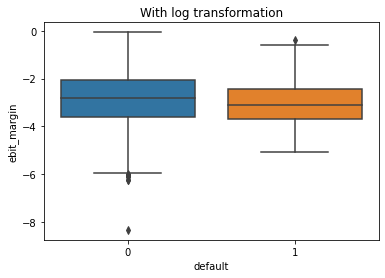

<Figure size 432x288 with 0 Axes>

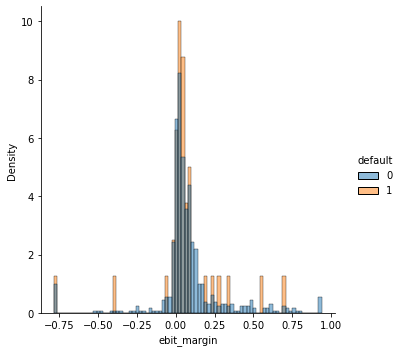

In [100]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

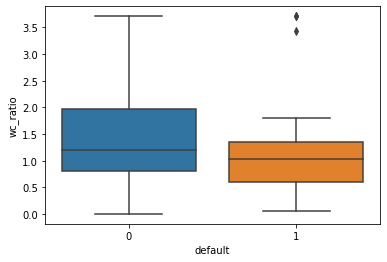

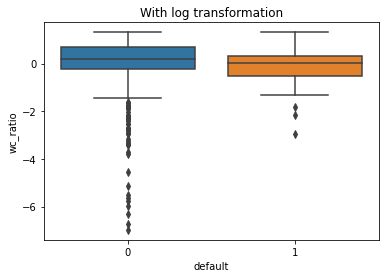

<Figure size 432x288 with 0 Axes>

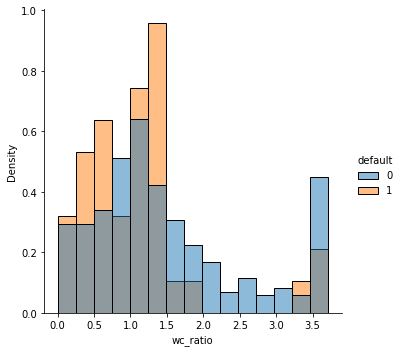

In [101]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

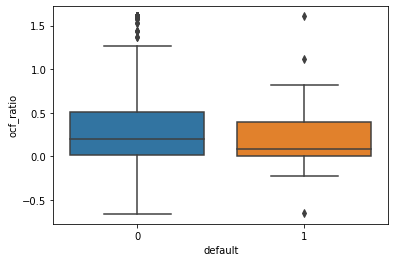

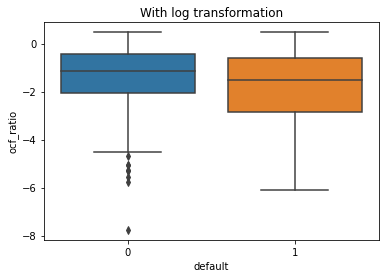

<Figure size 432x288 with 0 Axes>

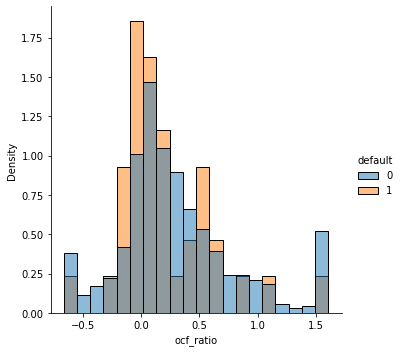

In [102]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

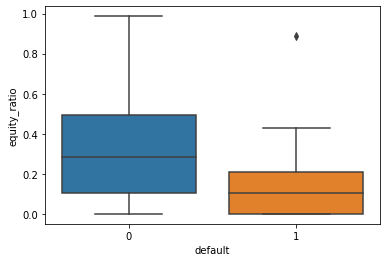

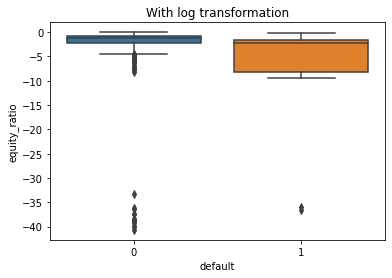

<Figure size 432x288 with 0 Axes>

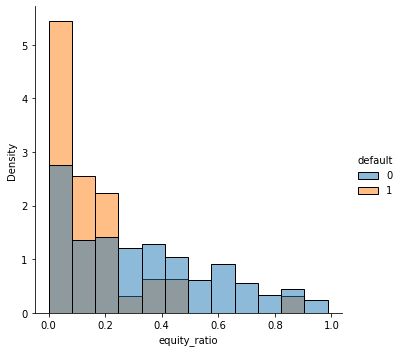

In [103]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

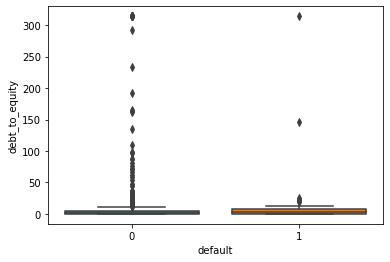

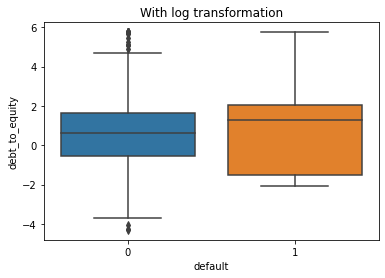

<Figure size 432x288 with 0 Axes>

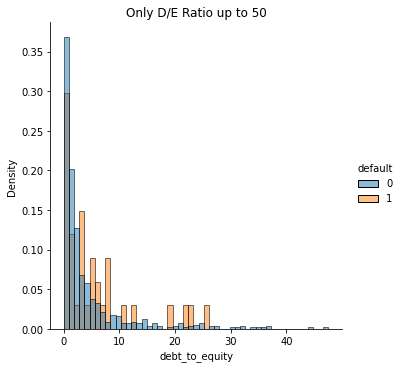

In [104]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

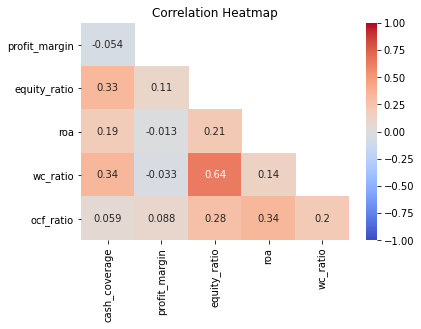

,cash_coverage,profit_margin,equity_ratio,roa,wc_ratio
profit_margin,-0.054233,1.000000,0.107217,-0.013467,-0.032525
equity_ratio,0.332076,0.107217,1.000000,0.214094,0.639378
roa,0.191741,-0.013467,0.214094,1.000000,0.141487
wc_ratio,0.337210,-0.032525,0.639378,0.141487,1.000000
ocf_ratio,0.059070,0.088445,0.275093,0.343695,0.203809


In [105]:
col = ['cash_coverage', 'profit_margin', 'equity_ratio', 'roa', 'wc_ratio', 'ocf_ratio']
data = df_train[col]
df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

## Univariate Ginis of our Variables of interest
Here we want to calculate the Gini coefficients, resulting from a logit model with only one variable of our interest. 

In [106]:
col_list = ["default","cash_coverage","profit_margin","wc_ratio","ocf_ratio","equity_ratio","roa"]
df_train[col_list]

,default,cash_coverage,profit_margin,wc_ratio,ocf_ratio,equity_ratio,roa
0,0,24.319201,0.361114,3.710767,0.949635,7.385670e-01,0.180537
1,0,68.910169,1.104725,0.663710,-0.617484,3.896983e-01,0.095967
2,0,68.910169,2.012151,3.328108,1.130863,9.370190e-04,0.001684
3,0,68.910169,2.012151,3.193566,0.665113,5.925318e-01,0.030412
4,0,0.473313,1.135876,0.102055,0.374604,4.174963e-01,0.040158
...,...,...,...,...,...,...,...
664,0,0.077889,0.506472,0.835583,0.026441,1.823358e-01,-0.001518
665,0,58.830851,0.446851,1.213142,-0.475269,3.418227e-01,0.173649
666,0,0.071810,1.000000,0.041927,0.009356,-3.086604e-17,0.013497
667,0,2.219296,1.049012,0.615002,0.220748,-1.273479e-16,0.063753


In [107]:
dictionary_univ_gini = dict()
for var in col_list[1:]:
    X = df_train[var]
    y = df_train["default"]
    X = sm.add_constant(X)

    random_numbers = np.random.randint(0,1000000,1000)

    for i in random_numbers:
        try:
            # Splitting data into training and testing sets.
            train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
            # The splited Logit Model
            mdl2split = sm.Logit(train_labels,train_features).fit()
            mdl2split.summary2()

            # Predict the test data
            predictions_split = mdl2split.predict(test_features)
            # Predict the training data
            predictions_split_train = mdl2split.predict(train_features)
            # Calculate the absolute errors
            errors = abs(predictions_split - test_labels)
    
            #AUC & Gini Graph + Calculations of splitted logit

            fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
            auc_split = metrics.auc(fpr_split, tpr_split) 

            # Predict the in sample (train) data for comparision
            fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
            auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
            #Store values in dictionary
            dictionary_univ_gini[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1,var
        
        except:
            continue

dictionary_univ_gini = pd.DataFrame.from_dict(dictionary_univ_gini,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample","Variable"])

;

tions 7
Optimization terminated successfully.
         Current function value: 0.214276
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214016
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213471
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212872
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214777
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.2

''

In [108]:
for i in col_list[1:]:
    print("Mean Gini out of sample with variable:", i, 
          dictionary_univ_gini["Gini out of sample"][dictionary_univ_gini["Variable"]==i].mean())
    

Mean Gini out of sample with variable: cash_coverage 0.46860510962753915
Mean Gini out of sample with variable: profit_margin 0.1165838491806783
Mean Gini out of sample with variable: wc_ratio 0.22779130403724115
Mean Gini out of sample with variable: ocf_ratio 0.10775235294466069
Mean Gini out of sample with variable: equity_ratio 0.4315576671345904
Mean Gini out of sample with variable: roa 0.14261279585798814


In [109]:
# Gini with only cash and wc ratio
var = ["cash","wc_ratio"]
dictionary_logit_two_vars = dict()
X = df_train[var]
y = df_train["default"]
X = sm.add_constant(X)

random_numbers = np.random.randint(0,1000000,1000)

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_logit_two_vars[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_logit_two_vars = pd.DataFrame.from_dict(dictionary_logit_two_vars,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])


    Iterations 11
Optimization terminated successfully.
         Current function value: 0.202187
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200175
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200178
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200431
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201484
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200971
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200974
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201634
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200156
         Iterations 12
Optimization terminated successfully.
         Current 

In [110]:
dictionary_logit_two_vars.mean() #gini does not get better

MSE                   0.106340
AUC out sample        0.675221
Gini out of sample    0.350442
AUC in sample         0.686116
Gini in sample        0.372232
dtype: float64

# Our Logit Regression

In [111]:
# cash_coverage + profit_margin + ebit_margin + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1'
mdl1 = sm.Logit.from_formula('default ~ equity_ratio + profit_margin + wc_ratio + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: default          AIC:              277.2322  
Date:               2021-01-11 21:54 BIC:              299.7536  
No. Observations:   668              Log-Likelihood:   -133.62   
Df Model:           4                LL-Null:          -145.83   
Df Residuals:       663              LLR p-value:      6.5388e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.4562   0.4311 -5.6971 0.0000 -3.3012 -1.6112
equity_ratio      -3.8535   1.0605 -3.6337 0.0003 -5.9321 -1.7750
profit_margin      0.6984   0.4131  1.6907 0.0909 -0.1112  1.5081
wc_ratio           0.0784   0.2082  

In [136]:
y = df_train["default"]
X = df_train[['equity_ratio', 'profit_margin', 'wc_ratio', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.200024
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: default          AIC:              277.2322  
Date:               2021-01-11 21:58 BIC:              299.7536  
No. Observations:   668              Log-Likelihood:   -133.62   
Df Model:           4                LL-Null:          -145.83   
Df Residuals:       663              LLR p-value:      6.5388e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.4562   0.4311 -5.6971 0.0000 -3.3012 -1.6112
equity_ratio      -3.8535   1.0605 -3.6337 0.0003 -5.9321 -1.7750
profit_margin      0.6984   0.4131  1.6907 0.0909 -0.1112  1.5081
wc_ratio           0.0784   0.2082  0.3765 0.7066 -0.3297  0.4865
roa               -0.9771   1.4859 -0.6576 0.5108 -3.8895  1.9352
=================================================================

"""

In [113]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
2,0,31.10
544,0,25.59
212,1,24.25
209,0,24.14
481,0,18.30
...,...,...
26,0,0.38
234,0,0.37
480,0,0.34
524,0,0.33


In [114]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,10.73
43,1,12.29
69,1,9.19
104,1,10.56
114,1,17.89
120,1,5.57
128,1,6.95
139,1,9.73
150,1,13.39
198,1,11.45


In [115]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.196946
         Iterations 8
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.6765873015873016
GINI (LY):  0.35317460317460325


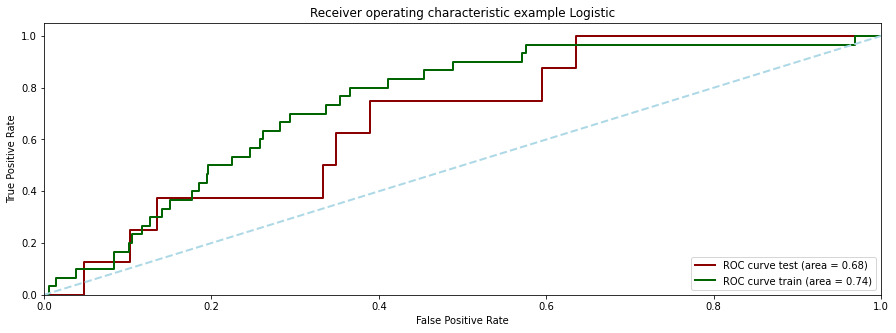

In [116]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.7307435254803676
GINI L1:  0.46148705096073517
AUC L2:   0.7307435254803676
GINI L2:  0.46148705096073517
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.6765873015873016
GINI Test Sample:  0.35317460317460325


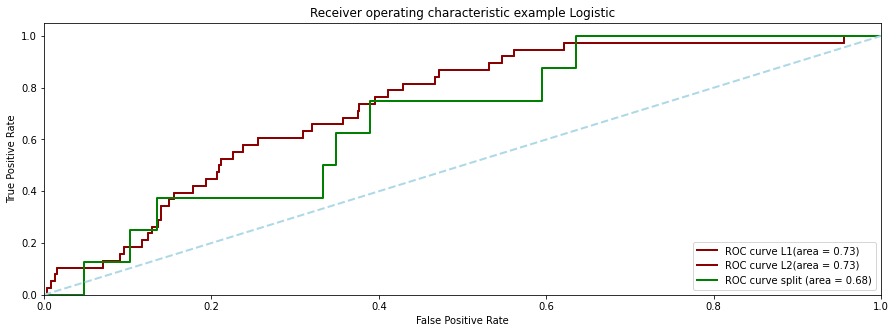

In [117]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [118]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

;

tions 8
Optimization terminated successfully.
         Current function value: 0.198551
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192693
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192558
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195588
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198978
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201313
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198171
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199933
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189094
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.2

''

In [119]:
dictionary_random_test.head()

,MSE,AUC out sample,Gini out of sample,AUC in sample,Gini in sample
463882,0.10,0.654216,0.308432,0.757725,0.515450
583199,0.10,0.671598,0.343195,0.750047,0.500095
429664,0.10,0.644970,0.289941,0.769763,0.539526
185544,0.11,0.706731,0.413462,0.730142,0.460284
621873,0.10,0.678994,0.357988,0.747299,0.494597


In [120]:
dictionary_random_test.describe()

,MSE,AUC out sample,Gini out of sample,AUC in sample,Gini in sample
count,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000
mean,0.105375,0.703592,0.407184,0.734854,0.469709
std,0.005197,0.049713,0.099426,0.024941,0.049882
min,0.090000,0.515163,0.030325,0.643128,0.286256
25%,0.100000,0.670488,0.340976,0.717346,0.434692
50%,0.110000,0.704512,0.409024,0.734123,0.468246
75%,0.110000,0.738536,0.477071,0.751848,0.503697
max,0.130000,0.865754,0.731509,0.825877,0.651754


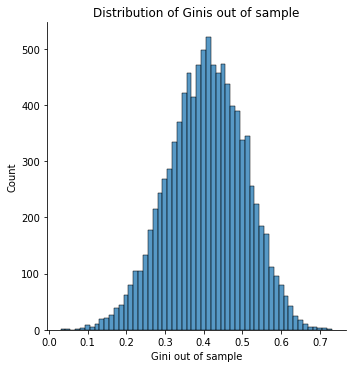

In [121]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

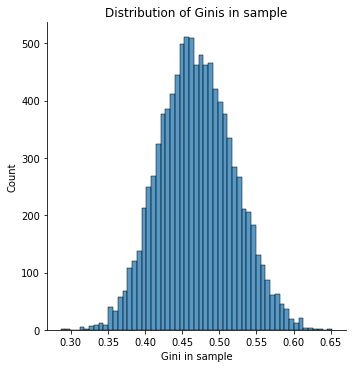

In [122]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [172]:
#Chose the variables for the RF
var_rf = ['equity_ratio', 'profit_margin', 'wc_ratio', 'roa']
# , 'ebit_margin', 'cash_coverage', 'neu'

In [173]:
# Assign the new features based on the choosen variables
X = df_train[var_rf]

In [174]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

0.9983361064891847

In [175]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.09 .


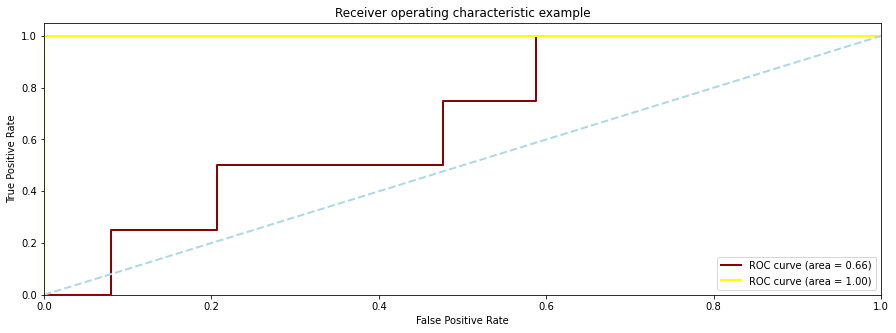

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.6626984126984127
GINI:  0.32539682539682535


In [176]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [126]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
#rf.fit(train_features, train_labels, sample_weight = weights)

# Coming to the Test Sample

In [145]:
df_test

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,cf_financing,total_liabilities,age_num,profit_margin,equity_ratio,wc_ratio,roa,ocf_ratio,debt_to_equity,ebit_margin
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,7.289467e+05,7.289467e+05,2.097214e+05,45390.50,...,-5.457891e+04,214860.19,35.0,0.287705,0.000000,0.525518,0.180193,0.072204,0.000000,0.062269
C_896,GmbH,13127,87100,1992,181.0,GKV,7.088473e+05,7.088473e+05,7.384952e+05,13017.29,...,-5.820000e-11,380723.43,29.0,1.041825,0.537732,1.425898,0.014819,-0.014919,0.859662,0.018364
C_252,GmbH,14059,86101,1993,505.0,GKV,2.602532e+07,2.601554e+07,2.202299e+07,2086104.36,...,-2.091456e+06,4582487.49,28.0,0.846214,0.367217,3.165258,0.061325,0.109983,0.333668,0.080157
C_165,GmbH,10437,87100,1995,82.0,GKV,1.105332e+06,1.105332e+06,7.174051e+05,88074.80,...,-1.160000e-10,98099.72,26.0,0.649040,0.790521,3.911569,0.182204,0.141362,0.256812,0.079682
C_856,GmbH,14943,96090,2002,22.0,GKV,5.199542e+07,5.197990e+07,4.642084e+07,5956777.13,...,-4.163971e+06,27576629.40,19.0,0.892787,0.160017,2.482512,0.121411,0.109550,4.038464,0.114563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_691,GmbH,83435,8930,1994,433.0,GKV,2.224117e+07,2.212290e+07,1.135134e+07,899393.22,...,1.124341e+06,8211837.02,27.0,0.510375,0.037415,0.734363,0.091467,0.124799,25.727209,0.040438
C_970,GmbH & Co. KG,89180,10390,1928,NaN,GKV,1.049671e+08,1.049671e+08,1.076738e+08,6771828.14,...,-1.163975e+07,63957453.47,93.0,1.025786,0.349197,1.467173,0.069005,0.138103,1.863716,0.064514
C_157,GmbH,82438,46495,1997,NaN,GKV,2.092688e+07,2.092688e+07,5.232887e+06,917317.49,...,-5.370269e+05,4102001.75,24.0,0.250056,0.419103,1.406278,0.126808,0.026051,1.386047,0.043834


In [150]:
X_test = df_test[['equity_ratio', 'profit_margin', 'wc_ratio', 'roa']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

X_test.loc['C_712','ocf_ratio'] = 0
X_test.loc['C_712']

equity_ratio     0.356453
profit_margin    0.454304
wc_ratio         1.391674
roa              0.204412
ocf_ratio        0.000000
Name: C_712, dtype: float64

In [151]:
prediction = pd.DataFrame(mdl1.predict(X_test))
x = round(prediction*100,2)

In [152]:
x.describe()

,0
count,330.000000
mean,6.144788
std,4.420852
min,0.560000
25%,2.242500
50%,5.525000
75%,8.882500
max,27.520000


In [153]:
x.sort_values(by=0,ascending=False)

,0
id,
C_772,27.52
C_524,19.19
C_340,19.07
C_717,17.41
C_064,16.97
...,...
C_255,0.58
C_698,0.57
C_408,0.57


In [154]:
df_test.loc["C_712"] #der geht nicht

legal_form                        GmbH
zip_code                         78056
sector                           26119
year_inc                          1954
count_emp                           93
type_pl                            GKV
sales                      7.29882e+07
gross_performance          7.43735e+07
gross_profit               3.31588e+07
earn_from_op                 6.165e+06
fin_result                     -447509
oth_interest_inc               60211.8
oth_interest_exp                507721
result_from_ord_bus        5.71749e+06
total_result               5.60547e+06
annual_profit              5.29181e+06
total_assets               2.79705e+07
total_liabilities_st       1.09504e+07
total_liabilities_mt                 0
total_liabilities_lt       7.04987e+06
bank_liabilities_st                NaN
bank_liabilities_mt                NaN
bank_liabilities_lt                NaN
trade_payables_st          3.11138e+06
trade_payables_mt                  NaN
trade_payables_lt        

## Random Forest Export

In [155]:
#X_test = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X_test.copy()
i_ndex = X_test.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [156]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [157]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

,0,1
id,,
C_570,64.15,35.85
C_260,71.68,28.32
C_698,71.92,28.08
C_045,73.01,26.99
C_126,74.95,25.05
...,...,...
C_784,98.89,1.11
C_457,98.93,1.07
C_100,98.93,1.07


In [158]:
y_RF.sort_values(by='Default',ascending=False)

,Default
id,
C_411,0
C_162,0
C_057,0
C_462,0
C_149,0
...,...
C_621,0
C_155,0
C_483,0


In [159]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

,Default,0,1
id,,,
C_411,0,95.63,4.37
C_896,0,94.57,5.43
C_252,0,97.54,2.46
C_165,0,97.44,2.56
C_856,0,90.16,9.84
...,...,...,...
C_691,0,98.34,1.66
C_970,0,94.17,5.83
C_157,0,92.95,7.05


 # Export
 the Data as a CSV file for the Upload
  

In [ ]:
#train_RF.to_csv("trained_RF-Approach.csv") #ausklammern für Export

In [ ]:
 #x.to_csv("trained_Logit-Approach.csv") #ausklammern für Export